In [1]:
import rmtchem 
import timeit
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import imp
import cantera as ct
imp.reload(rmtchem)
from scipy.sparse import csr_matrix
plt.rcParams.update({'font.size': 16, 'pdf.fonttype':42,'text.usetex': False, 'font.family': 'serif'})

### Example graph 

58


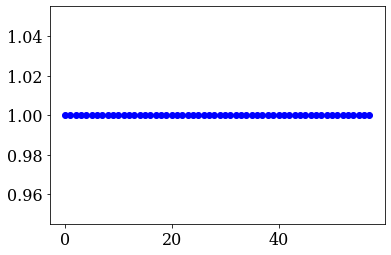

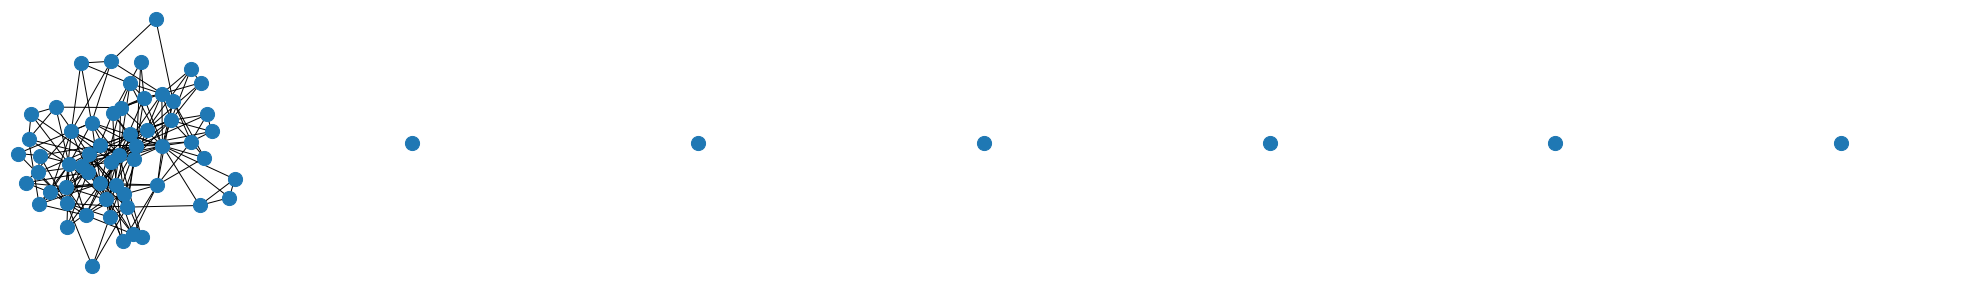

In [3]:
n=64
c=0.5
nr=int(c*n)
seed=1

np.random.seed(seed)
eta,nu,k,G=rmtchem.get_network(n,nr)
adj=np.zeros((n,n))
for r in range(2*nr):
    reac=np.where(eta[r]>0)[0]
    prod=np.where(nu[r]>0)[0]
    for i in reac:
        for j in prod:
            adj[i,j]=1
        #if species are both reactants, they affect rates of change of each other
        for j in reac:
            adj[i,j]=1
g=nx.convert_matrix.from_numpy_matrix(adj)

lcc=np.array(list(max(nx.connected_components(g), key=len)))
n=len(lcc)
eta=eta[:,lcc]
nu=nu[:,lcc]
G=G[lcc]

print(n)
X0=np.exp(-G)
XD1=np.zeros(n)
XD2=np.zeros(n)
success,Xs2=rmtchem.steady(X0,eta,nu,k,XD1,XD2)
plt.plot(Xs2/X0,'bo')
plt.show()

g=nx.convert_matrix.from_numpy_matrix(adj)
components=list(sorted(nx.connected_components(g)))
if len(components)>1:
    fig, ax = plt.subplots(1,len(components),figsize=(5*len(components),5))
    for i in range(len(components)):
        comp=list(components)[i]
        idx=np.array(list(comp))
        nx.draw(nx.convert_matrix.from_numpy_matrix(adj[np.ix_(idx,idx)]),node_size=200,ax=ax[i])
        ax[i].axis('off')
else:
    nx.draw(g,node_size=200)

plt.savefig('plots/fig1b.pdf')
plt.show()
# Xs,success=rmtchem.integrate(X0,eta,nu,k,XD1,XD2,100,0.1,prog=True)
# plt.plot(Xs)
# plt.show()

### Chemical network percolation

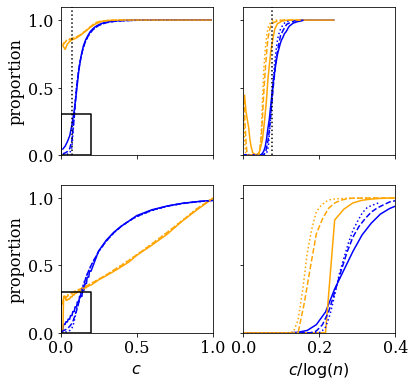

In [4]:
ns=[64,512,4096]
ls=['-','--',':']

plt.subplots(2,2,figsize=(6,6))

plt.subplot(2,2,1)
plt.ylabel("proportion")
plt.ylim(0,1.1)
plt.xlim(0,1)
locs, labels = plt.xticks()
plt.xticks(locs,[])

for i in range(3):
    n=ns[i]
    dat=np.loadtxt('data/er/'+str(n)+'_counts.txt')
    plt.plot(dat[:,1]/(20/3),dat[:,2],color='blue',linestyle=ls[i])
    plt.plot(dat[:,1]/(20/3),dat[:,3],color='orange',linestyle=ls[i])
plt.plot([0,0.2,0.2,0,0],[0.3,0.3,0,0,0.3],color='black')
plt.plot([3/40,3/40],[0,1.1],color='black',linestyle=':')

plt.subplot(2,2,2)
plt.ylim(0,1.1)
plt.xlim(0,0.4)
locs, labels = plt.yticks()
plt.yticks(locs,[])
plt.ylim(0,1.1)

locs, labels = plt.xticks()
plt.xticks(locs,[])
for i in range(3):
    n=ns[i]
    dat=np.loadtxt('data/er/'+str(n)+'_counts.txt')
    plt.plot(dat[:,1]/(20/3)/np.log(n),dat[:,4],color='blue',linestyle=ls[i])
    plt.plot(dat[:,1]/(20/3)/np.log(n),dat[:,5],color='orange',linestyle=ls[i])
plt.plot([3/40,3/40],[0,1.1],color='black',linestyle=':')

plt.subplot(2,2,3)
plt.xlabel('$c$')
plt.ylabel("proportion")
plt.ylim(0,1.1)
plt.xlim(0,1)
for i in range(len(ns)):
    n=ns[i]
    dat=np.loadtxt('data/sing/'+str(n)+'_counts.txt')
    plt.plot(dat[:,1],dat[:,2],color='blue',linestyle=ls[i])
    plt.plot(dat[:,1],dat[:,3],color='orange',linestyle=ls[i])
    
plt.plot([0,0.2,0.2,0,0],[0.3,0.3,0,0,0.3],color='black')

plt.subplot(2,2,4)
plt.xlabel('$c/\log(n)$')
plt.xlim(0,0.4)
plt.ylim(0,1.1)
locs, labels = plt.yticks()
plt.yticks(locs,[])
plt.ylim(0,1.1)

for i in range(len(ns)):
    n=ns[i]
    dat=np.loadtxt('data/sing/'+str(n)+'_counts.txt')
    plt.plot(dat[:,1]/np.log(n),dat[:,4],color='blue',linestyle=ls[i])
    plt.plot(dat[:,1]/np.log(n),dat[:,5],color='orange',linestyle=ls[i])
plt.savefig('plots/fig2.pdf')
plt.show()

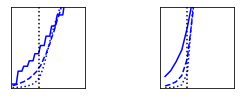

In [5]:
ns=[64,512,4096]
ls=['-','--',':']
fig, axs = plt.subplots(1,2,figsize=(4,1.5))

plt.subplot(1,2,1)
plt.xlim(0,0.2)
plt.ylim(0,0.3)
plt.yticks([],[])
plt.xticks([],[])

for i in range(3):
    n=ns[i]
    dat=np.loadtxt('data/sing/'+str(n)+'_counts.txt')
    plt.plot(dat[:,1],dat[:,2],color='blue',linestyle=ls[i])
plt.plot([3/40,3/40],[0,1.1],color='black',linestyle=':')

plt.subplot(1,2,2)
plt.xlim(0,0.2)
plt.ylim(0,0.3)
plt.yticks([],[])
plt.xticks([],[])

for i in range(3):
    n=ns[i]
    dat=np.loadtxt('data/er/'+str(n)+'_counts.txt')
    plt.plot(dat[:,1]/(20/3),dat[:,2],color='blue',linestyle=ls[i])
plt.plot([3/40,3/40],[0,1.1],color='black',linestyle=':')
plt.subplots_adjust(wspace=1.0,hspace=0.0)

plt.savefig('plots/fig2insets.pdf')
plt.show()


### Bifurcation examples

In [6]:
imp.reload(rmtchem)

<module 'rmtchem' from '/Users/zack/Documents/rmtchem/rmtchem.py'>

In [9]:
vals=np.loadtxt('data/hystereses2/'+str(64)+'_'+str(0.3)+'_'+str(0.1)+'_'+str(0)+'.txt')
seeds=vals[np.where(vals[:,4]==2)[0], 1].astype(int)

ms=[]
ss=[]
for sind in range(0,10):
    seed=seeds[sind]
    print("%i %i\t\r"%(sind,len(seeds)),end='')
    n=64
    nr=79
    nd=6
    na=0
    np.random.seed(seed)
    eta,nu,k,G=rmtchem.get_network(n,nr,na)

    row,col=np.where(eta[::2]-nu[::2]!=0)
    data=(eta[::2]-nu[::2])[row,col]
    A=csr_matrix((data,(row,col)),shape=(2*nr,n),dtype=int)
    adj=A.T.dot(A)
    g=nx.convert_matrix.from_scipy_sparse_matrix(adj)
    lcc=np.array(list(max(nx.connected_components(g), key=len)))
    n=len(lcc)
    eta=eta[:,lcc]
    nu=nu[:,lcc]
    G=G[lcc]
    d0=1e3
    d1min=1
    d1max=100
    steps=1000
    XD1s,XD2s,inds=rmtchem.get_drive(eta,nu,k,G,d0,d1min,d1max,steps,nd)
    X0=np.exp(-G)
    Xs,evals,bif=rmtchem.quasistatic(X0, eta, nu, k, XD1s, XD2s, output=False,stop=True)
    ms.append(len(Xs))
    ss.append(seed)
print('\n',np.transpose([ms,ss]))

/Users/zack/Documents/rmtchem/rmtchem.py:64: RuntimeWarning: divide by zero encountered in true_divide
  return -np.diag(XD2)+np.tensordot(np.transpose((eta-nu)*rates(X,eta,nu,k)[:,np.newaxis]),nu/X,axes=1)
/Users/zack/Documents/rmtchem/rmtchem.py:64: RuntimeWarning: invalid value encountered in true_divide
  return -np.diag(XD2)+np.tensordot(np.transpose((eta-nu)*rates(X,eta,nu,k)[:,np.newaxis]),nu/X,axes=1)


/Users/zack/Documents/rmtchem/rmtchem.py:61: RuntimeWarning: invalid value encountered in multiply
  return XD1-XD2*X+np.sum((eta-nu)*rates(X,eta,nu,k)[:,np.newaxis],axis=0)
/Users/zack/Documents/rmtchem/rmtchem.py:58: RuntimeWarning: overflow encountered in power
  return k*np.product(X**nu,axis=1)


9 484	
 [[ 697 1000]
 [  42 1004]
 [  17 1006]
 [ 189 1008]
 [ 350  100]
 [  84 1010]
 [ 136 1012]
 [  14 1013]
 [ 203 1014]
 [   6 1015]]


In [ ]:
# 124 works ok for saddle-node

In [42]:
imp.reload(rmtchem)

<module 'rmtchem' from '/Users/zack/Documents/rmtchem/rmtchem.py'>

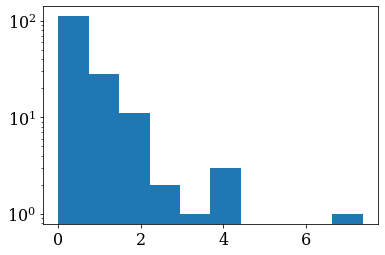

In [45]:
imp.reload(rmtchem)
n=64
nr=79
nd=6
na=0
seed=1000
np.random.seed(seed)
eta,nu,k,G=rmtchem.get_network(n,nr,na) 
plt.yscale('log')
plt.hist(k)
plt.show()

In [36]:
G[np.argsort(G)[-nd:]]

array([1.39442275, 1.53316107, 1.60008337, 1.92301013, 2.57475919,
       2.69964586])

In [30]:
ind=np.argmax([-(np.sum(nu[2*i]*G)-np.sum(eta[2*i]*G)) for i in range(nr)])
print(eta[2*ind]*G)
print(nu[2*ind]*G)
print(k[2*ind])

[-0.          0.         -0.          0.         -0.          0.
 -0.         -0.          0.         -0.          0.         -0.
 -0.         -0.         -0.          0.         -0.          0.
  0.         -0.         -0.         -0.          0.          0.
  0.          0.         -0.         -0.         -0.          3.20016674
 -0.          0.         -0.         -0.         -0.          0.
 -0.         -0.         -0.          0.         -0.          0.
  0.          0.         -0.         -0.         -0.         -0.
 -0.         -0.          2.57475919  0.         -0.         -0.
  0.          0.         -0.         -0.          0.          0.
 -0.         -0.          0.          0.        ]
[-0.          0.         -0.          0.         -0.          0.
 -0.         -0.          0.         -0.          0.         -0.
 -0.         -0.         -0.          0.         -0.          0.
  0.         -0.         -0.         -0.          0.          0.
  0.          0.         -0.    

6941	
saddle-node bifurcation (transcritical or pitchfork)! 6941


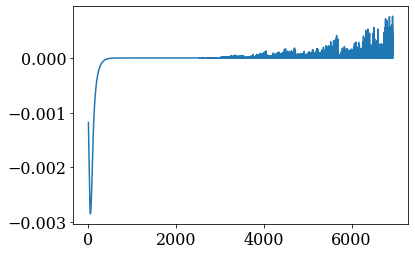

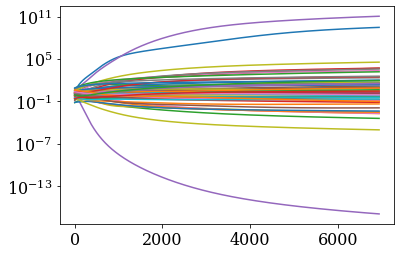

In [8]:
n=64
nr=79
nd=6
na=0
seed=1000
np.random.seed(seed)
eta,nu,k,G=rmtchem.get_network(n,nr,na) 
row,col=np.where(eta[::2]-nu[::2]!=0)
data=(eta[::2]-nu[::2])[row,col]
A=csr_matrix((data,(row,col)),shape=(2*nr,n),dtype=int)
adj=A.T.dot(A)
g=nx.convert_matrix.from_scipy_sparse_matrix(adj)
lcc=np.array(list(max(nx.connected_components(g), key=len)))
n=len(lcc)
eta=eta[:,lcc]
nu=nu[:,lcc]
G=G[lcc]
d0=1e3
d1min=1
d1max=100
steps=10000
XD1s,XD2s,inds=rmtchem.get_drive(eta,nu,k,G,d0,d1min,d1max,steps,nd)
X0=np.exp(-G)
Xs,evals,bif=rmtchem.quasistatic(X0, eta, nu, k, XD1s, XD2s, True, False)
plt.plot(np.max(np.real(evals[:-2]),axis=1))
plt.show()

plt.plot(Xs)
plt.yscale('log')
plt.show()
# X2s,evals2,bif2=rmtchem.quasistatic(sol.x, eta, nu, k, np.flip(XD1s[:m+2],axis=0), np.flip(XD2s[:m+2],axis=0), True)
# X3s,evals3,bif3=rmtchem.quasistatic(X2s[0], eta, nu, k, XD1s[m+1:], XD2s[m+1:], True)

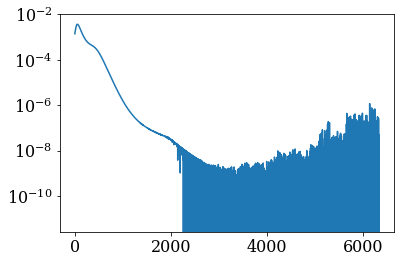

In [5]:
plt.yscale('log')
plt.plot(-np.max(np.real(evals),axis=1))

False


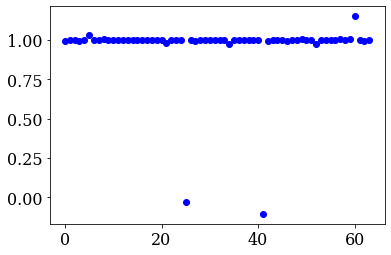

-3.5825255626397034e-08


Integration: 100%|##############################################| Time: 0:00:53


False


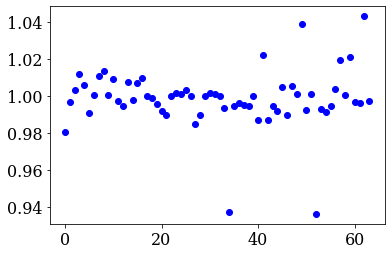

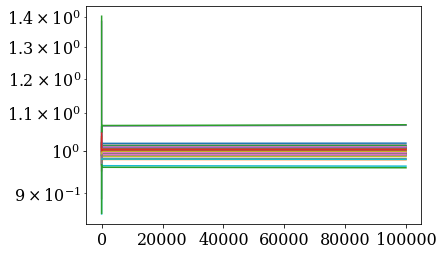

In [45]:
m=len(Xs)-1
XD1=XD1s[m+1]
XD2=XD2s[m+1]
np.random.seed(1)
success,solx=rmtchem.steady(Xs[m],eta, nu, k, XD1,XD2)
print(success)
plt.plot(Xs[m]/(solx),'bo')
plt.show()

mat=rmtchem.jac(Xs[m],eta, nu, k, XD1,XD2)
ev,evec=np.linalg.eig(mat)
print(np.max(np.real(ev)))

X2,success=rmtchem.integrate(Xs[m]*(1+(0.5-np.random.random(size=n))*1e-1), eta, nu, k, XD1,XD2,1e6,1e1,prog=True)

success,solx=rmtchem.steady(X2[-1],eta, nu, k, XD1,XD2)
print(success)
plt.plot(Xs[m]/(solx),'bo')
plt.show()

plt.yscale('log')
plt.plot(X2/Xs[m])
plt.show()

In [597]:
if(success):
    X2s,evals2,bif2=rmtchem.quasistatic(solx, eta, nu, k, np.flip(XD1s[:m+2],axis=0), np.flip(XD2s[:m+2],axis=0), True)
    X3s,evals3,bif3=rmtchem.quasistatic(X2s[0], eta, nu, k, XD1s[m+1:], XD2s[m+1:], True)

12	2	size large 1900 0.0957792892351874 		
saddle-node bifurcation!  12


ValueError: could not broadcast input array from shape (19) into shape (3253)

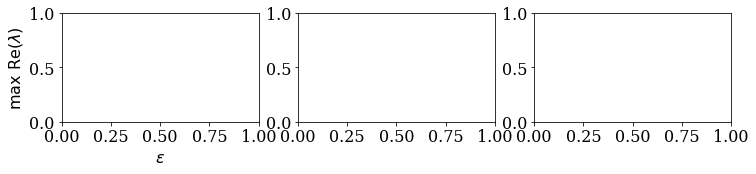

In [565]:
m=len(Xs)-1
m2=len(X2s)-1
plt.subplots(1,3,figsize=(12,2))
plt.subplot(1,3,1)
plt.xlabel(r'$\epsilon$')
plt.ylabel(r'$\mathrm{max}~\mathrm{Re}(\lambda)$')
evals4=np.zeros(steps)
evals5=np.zeros(steps)
d1s=np.arange(d1min,d1max,(d1max-d1min)/steps)
evals4[:m+1]=np.max(np.real(evals),axis=1)
evals4[m+1:]=np.max(np.real(evals3),axis=1)
evals5[m+1:]=np.max(np.real(evals3),axis=1)
evals5[m-m2:m+1]=np.flip(np.max(np.real(evals2),axis=1),axis=0)
evals5[:m-m2]=np.max(np.real(evals),axis=1)[:m-m2]
plt.plot(d1s,evals4)
plt.plot(d1s,evals5)

plt.subplot(1,3,2)
lim=1.1*np.max(np.abs(evals[-1,np.argsort(np.real(evals[-1]))[-3:]]))
plt.xlim(-lim,lim)
plt.ylim(-lim,lim)
plt.ylabel(r'$\mathrm{Im}(\lambda)$')
plt.xlabel(r'$\mathrm{Re}(\lambda)$')
plt.plot(np.real(evals[-2]),np.imag(evals[-2]),'bo')

plt.subplot(1,3,3)
plt.yscale('log')
plt.ylabel(r"$X_i'/X_i^0$")
plt.xlabel('$\epsilon$')
X4s=np.zeros((steps,n))
X5s=np.zeros((steps,n))
d1s=np.arange(d1min,d1max,(d1max-d1min)/steps)
X4s[:m+1]=Xs
X4s[m+1:]=X3s
X5s[m+1:]=X3s
X5s[m-m2:m+1]=np.flip(X2s,axis=0)
X5s[:m-m2]=Xs[:m-m2]
plt.yscale('log')
plt.ylim(0.01,100)
plt.plot(d1s,X5s/X4s)

plt.subplots_adjust(wspace=0.5,hspace=0.0)
plt.savefig('plots/fig3a.pdf')
plt.show()

In [ ]:
#TODO: do this for the saddle-node bifurcations, and pick one that occurs for intermediate m

In [175]:
vals=np.loadtxt('data/hystereses2/'+str(64)+'_'+str(0.3)+'_'+str(0.1)+'_'+str(0)+'.txt')
seeds=vals[np.where(vals[:,4]==1)[0], 1].astype(int)

bs=[]
for sind in range(len(seeds)):
    seed=seeds[sind]
    print("%i %i\t\r"%(sind,len(seeds)),end='')
    n=64
    nr=79
    nd=6
    na=0
    np.random.seed(seed)
    eta,nu,k,G=rmtchem.get_network(n,nr,na)

    row,col=np.where(eta[::2]-nu[::2]!=0)
    data=(eta[::2]-nu[::2])[row,col]
    A=csr_matrix((data,(row,col)),shape=(2*nr,n),dtype=int)
    adj=A.T.dot(A)
    g=nx.convert_matrix.from_scipy_sparse_matrix(adj)
    lcc=np.array(list(max(nx.connected_components(g), key=len)))
    n=len(lcc)
    eta=eta[:,lcc]
    nu=nu[:,lcc]
    G=G[lcc]
    d0=1e3
    d1min=1
    d1max=100
    steps=1000
    XD1s,XD2s,inds=rmtchem.get_drive(eta,nu,k,G,d0,d1min,d1max,steps,nd)
    X0=np.exp(-G)
    Xs,evals,bif=rmtchem.quasistatic(X0, eta, nu, k, XD1s, XD2s, output=False,stop=False)
    bs.append(bif)
seeds[np.where(np.array(bs)==0)]

array([1001,  148,  187,  245,  275,  366,  471,  502,  523,  546,  611,
        672,  696,  736,  770,  777,  887,  943,  965])

1000 0


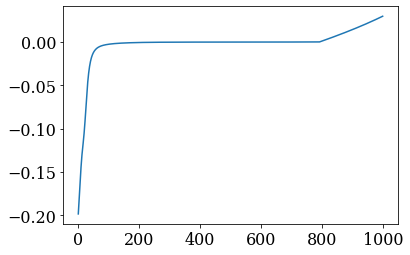

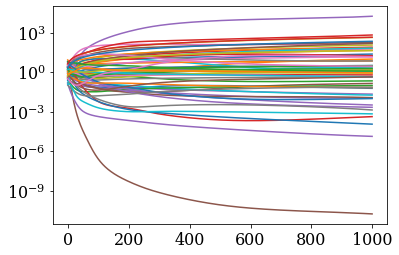

In [184]:
n=64
nr=79
nd=6
na=0
seed=245
np.random.seed(seed)
eta,nu,k,G=rmtchem.get_network(n,nr,na)

row,col=np.where(eta[::2]-nu[::2]!=0)
data=(eta[::2]-nu[::2])[row,col]
A=csr_matrix((data,(row,col)),shape=(2*nr,n),dtype=int)
adj=A.T.dot(A)
g=nx.convert_matrix.from_scipy_sparse_matrix(adj)
lcc=np.array(list(max(nx.connected_components(g), key=len)))
n=len(lcc)
eta=eta[:,lcc]
nu=nu[:,lcc]
G=G[lcc]

d0=1e3
d1min=1
d1max=100
steps=1000
XD1s,XD2s,inds=rmtchem.get_drive(eta,nu,k,G,d0,d1min,d1max,steps,nd)
X0=np.exp(-G)
Xs,evals,bif=rmtchem.quasistatic(X0, eta, nu, k, XD1s, XD2s, output=False,stop=False)
print(len(Xs),bif)
plt.plot(np.max(np.real(evals),axis=1))
plt.show()

plt.plot(Xs)
plt.yscale('log')
plt.show()

Integration: 100%|##############################################| Time: 0:00:18


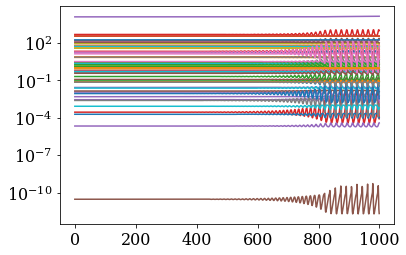

In [187]:
m=np.where(np.max(np.real(evals),axis=1)>1e-3)[0][0]
XD1=XD1s[m]
XD2=XD2s[m]

X2,success=rmtchem.integrate(Xs[m]*(1+(0.5-np.random.random(size=n))*1e-3), eta, nu, k, XD1,XD2,1e4,1e1,prog=True)
plt.yscale('log')
plt.plot(X2)
plt.show()

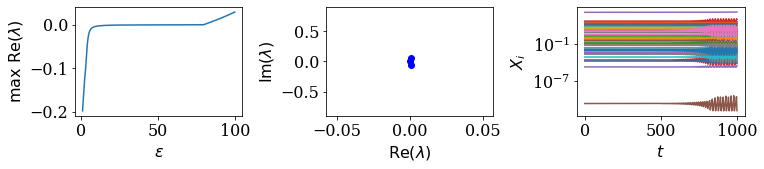

In [188]:
d1s=np.arange(d1min,d1max,(d1max-d1min)/steps)

plt.subplots(1,3,figsize=(12,2))
plt.subplot(1,3,1)
plt.xlabel(r'$\epsilon$')
plt.ylabel(r'$\mathrm{max}~\mathrm{Re}(\lambda)$')
plt.plot(d1s,np.max(np.real(evals),axis=1))

plt.subplot(1,3,2)
lim=1.1*np.max(np.abs(evals[m,np.argsort(np.real(evals[m]))[-3:]]))
plt.xlim(-lim,lim)
# plt.ylim(-lim,lim)
plt.ylim(-0.9,0.9)
plt.ylabel(r'$\mathrm{Im}(\lambda)$')
plt.xlabel(r'$\mathrm{Re}(\lambda)$')
plt.plot(np.real(evals[m]),np.imag(evals[m]),'bo')

plt.subplot(1,3,3)
plt.yscale('log')
plt.ylabel('$X_i$')
plt.xlabel('$t$')
plt.plot(np.arange(0,1e3,1e0),X2)
plt.subplots_adjust(wspace=0.5,hspace=0.0)
plt.savefig('plots/fig3b.pdf')
plt.show()

### Bifurcations vs driving and connectivity

(81, 5)


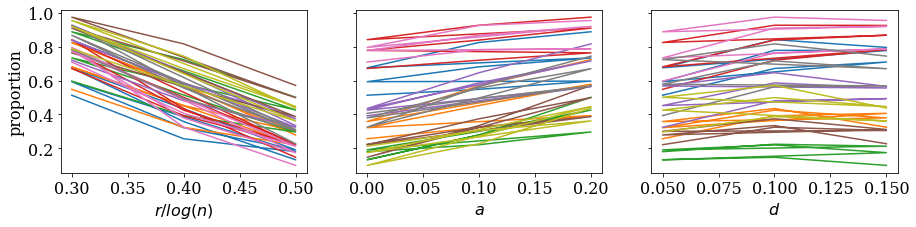

In [7]:
ns=[64,128,256]
cs=[0.3,0.4,0.5]
ds=[0.05,0.1,0.15]
ass=[0,0.1,0.2]
tab=[]
for n in ns:
    for c in cs:
        for d in ds:
            for a in ass:
                vals=np.loadtxt('data/hystereses2/'+str(n)+'_'+str(c)+'_'+str(d)+'_'+str(a)+'.txt')
                tot=np.count_nonzero(vals[:,4]==0)+np.count_nonzero(vals[:,4]==1)+np.count_nonzero(vals[:,4]==2)
                tab.append([c, d, a, np.count_nonzero(vals[:,4]==1)/tot,  np.count_nonzero(vals[:,4]==2)/tot])
                
tab=np.array(tab)
print(tab.shape)
cs=np.unique(tab[:,0])
ds=np.unique(tab[:,1])
ass=np.unique(tab[:,2])

fig,ax=plt.subplots(1,3,figsize=(15,3))
plt.subplot(1,3,1)
plt.xlabel('$r/log(n)$')
plt.ylabel('proportion')
for d in ds:
    for a in ass:
        ind=np.where(np.all(tab[:,[1,2]]==[d,a],axis=1))[0]
        plt.plot(tab[ind,0],tab[ind,4]+tab[ind,3])

plt.subplot(1,3,2)
plt.tick_params(axis='y', which='both', left=True,  right=False, labelleft=False) 
plt.xlabel('$a$')
for d in ds:
    for c in cs:
        ind=np.where(np.all(tab[:,[1,0]]==[d,c],axis=1))[0]
        plt.plot(tab[ind,2],tab[ind,4]+tab[ind,3])

plt.subplot(1,3,3)
plt.tick_params(axis='y', which='both', left=True,  right=False, labelleft=False) 
plt.xlabel('$d$')
for a in ass:
    for c in cs:
        ind=np.where(np.all(tab[:,[2,0]]==[a,c],axis=1))[0]
        plt.plot(tab[ind,1],tab[ind,4]+tab[ind,3])
plt.savefig('plots/fig4.pdf',transparent=True)
plt.show()

In [97]:
from scipy.stats import ttest_ind,pearsonr

for n in ns:
    for d in ds:
        for c in cs:
            for a in as:
                vals=np.loadtxt('data/hystereses2/'+str(n)+'_'+str(c)+'_'+str(d)+'_'+str(a)+'.txt')
                x=vals[np.where(vals[:,4]==2.)[0],5]
                y=(vals[np.where(vals[:,4]==2.)[0],8]-vals[np.where(vals[:,4]==2.)[0],9])/c
                print(pearsonr(x,y))

(0.007023553559090158, 0.9398295749215291)
(0.05031621681687626, 0.6596683575935252)
(0.4774085427787028, 0.0013885822371962962)
(-0.01021271270369667, 0.9033048204107208)
(-0.0020229801519840163, 0.9846455974059817)
(-0.07887154440665113, 0.538920812984755)
(0.13433772652730494, 0.18494384253712537)
(-0.056084641418866814, 0.6785993008655892)
(-0.12374386963283965, 0.4020580215137715)


### Empirical reaction network stoichiometry

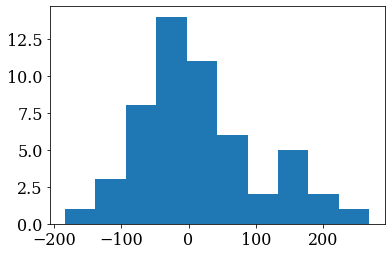

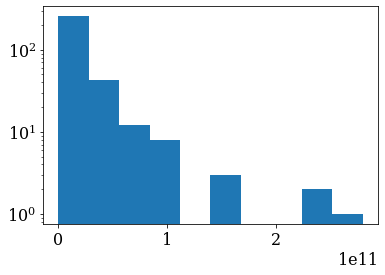

In [7]:
gas=ct.Solution('gri30.cti')
plt.hist(gas.standard_gibbs_RT)
plt.show()
plt.yscale('log')
plt.hist(gas.forward_rate_constants)
plt.show()

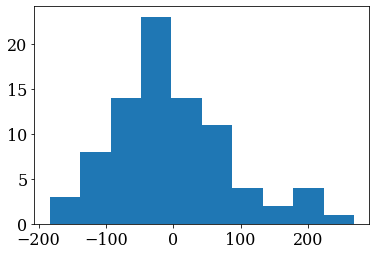

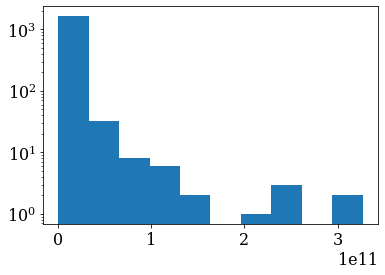

In [8]:
gas=ct.Solution('pyrolysis.cti')
plt.hist(gas.standard_gibbs_RT)
plt.show()
indices=np.where(gas.forward_rate_constants<1e15)[0]
plt.yscale('log')
plt.hist(gas.forward_rate_constants[indices])
plt.show()